# Assignment 2

In [40]:
# Target griup analysis
import folium
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth( 
    geo_data=state_geo,
    data=h1b_certified_state_salary_count,
    columns=['job_info_work_state', 'wage_per_year_kUSD'],
    key_on='feature.id',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='the number of h1b certificated cases'
).add_to(m)

folium.LayerControl().add_to(m)

m

In [41]:
# Average salary analysis
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth( 
    geo_data=state_geo,
    data=h1b_certified_state_salary_mean,
    columns=['job_info_work_state', 'wage_per_year_kUSD'],
    key_on='feature.id',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average of salary(k$)'
).add_to(m)

folium.LayerControl().add_to(m)

m

In [42]:
# Salary inequality analysis
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth( 
    geo_data=state_geo,
    data=h1b_certified_state_salary_var,
    columns=['job_info_work_state', 'wage_per_year_kUSD'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Variance of salary'
).add_to(m)

folium.LayerControl().add_to(m)

m

### Data description
The datasets I choose is US Permanent Visa Applications Dataset on Kaggle(https://www.kaggle.com/jboysen/us-perm-visas). The main source of data is from Department of Labor (DOL), which includes 374362 information on employer, position, wage offered, job posting history, employee education and past visa history, associated lawyers, and final decision in the U.S. from 2010 to 2016.

What I am focusing on is the anaual salary of H1B certified group. Since the unit measures the salary varies, I decide to use the wage measured by year/yr because it is hard to figure out specific working days and working hours for different people and estimate their annual salary. Also, by using box plot to find outliers, I decide to drop these outliers directly since they are very abnormal and will have a strong impact on mean and variance of annual salary.

### Figure description
Three figures are related to annual salaries and the number of people H1B certified group based on their job location.
- Figure 1 describes the number of people who got certified H1B in different states.
- Figure 2 describes the average annual salary of people who got certified H1B in different states.
- Figure 3 describes the variance of annual salary in different states.

### Findings
1. **The economy of the state and H1B certified group have slightly positive relationship.** 

    H1B certified group are mainly from California, Texas, New York, New Jersey, Massachusetts, Washington and Illinois. According to the GDP ranking by state in 2016 (https://simple.wikipedia.org/wiki/List_of_U.S._states_by_GDP), 5 of 7 states we mentioned is the top 10 largest economy of the US, including CA, TX, NY, NJ, IL. Even thougn Massachusetts(No.11) and Washington(No.14) are not top 10 of the states at that time, their economy keep increasing and as we can see, they become NO.10 and NO.12 in the latest ranking(https://www.statista.com/statistics/248023/us-gross-domestic-product-gdp-by-state/). Therefore, we can conclude that the economy of the state and H1B certified group are positively related. 

    However, since the difference between states mentioned above are very big, we tend to think this relationship is not that strong. I think the industrial composition of each state is also related to H1B certified. For example, California has the largest group of H1B certified group. It is because computer and electronic product manufacturing is the largest industry of California. People worked in these industries usually have STEM education backgroud, which means they are more likely to be selected in H1B lottery process.
    
    
2. **The average annual wage of H1B certified group are above the average of the us workers.**

    According to the table of average net compenstation(https://www.ssa.gov/oact/cola/central.html), the range of average income is from 41k to 46k during 2010-2016, but the average annual wage of H1B certified group are above 46k dollars in a large percentage of the states based on figure 2. Besides, as we can see in the distribution of the US(in the data processing part), the distribution of annual salary can be considered a normal distribution and the average is about 92k dollars. Therefore, the average annual wage of H1B certified group are above the average of us workers entirely, which are not directly related to the economy of different states. As we can see, the average salary of several states in the Mountain states and West North Central states are also very high.
    

3. **People worked in the middle of the US with H1B certified visa face the worst inequality of the salary**

    According to figure 3, the variance is different in different regions. The western part of the US is the lowest. And the worst wage gap of H1B certified is in the middle of the US. Therefore, people worked in the middle of the US with H1B certified visa face the inequality of the salary. However, the inequality of salary is not a serious problem in H1B certified group since the variance is small in a majority of the states. Besides, I find that some regions where H1B certified group have high salary , like NY, CA, WA, are relatively equal of their salary.

### Data processing

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load dataset
us_visa_df = pd.read_csv('us_perm_visas.csv', low_memory = False, parse_dates=['decision_date', 'case_received_date'])
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [3]:
# preview the dataset
us_visa_df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,country_of_citizenship,country_of_citzenship,decision_date,employer_address_1,employer_address_2,employer_city,employer_country,employer_decl_info_title,employer_name,employer_num_employees,employer_phone,employer_phone_ext,employer_postal_code,employer_state,employer_yr_estab,foreign_worker_info_alt_edu_experience,foreign_worker_info_birth_country,foreign_worker_info_city,foreign_worker_info_education,foreign_worker_info_education_other,foreign_worker_info_inst,foreign_worker_info_major,foreign_worker_info_postal_code,foreign_worker_info_rel_occup_exp,foreign_worker_info_req_experience,foreign_worker_info_state,foreign_worker_info_training_comp,foreign_worker_ownership_interest,foreign_worker_yr_rel_edu_completed,fw_info_alt_edu_experience,fw_info_birth_country,fw_info_education_other,fw_info_postal_code,fw_info_rel_occup_exp,fw_info_req_experience,fw_info_training_comp,fw_info_yr_rel_edu_completed,fw_ownership_interest,ji_foreign_worker_live_on_premises,ji_fw_live_on_premises,ji_live_in_dom_svc_contract,ji_live_in_domestic_service,ji_offered_to_sec_j_foreign_worker,ji_offered_to_sec_j_fw,job_info_alt_cmb_ed_oth_yrs,job_info_alt_combo_ed,job_info_alt_combo_ed_exp,job_info_alt_combo_ed_other,job_info_alt_field,job_info_alt_field_name,job_info_alt_occ,job_info_alt_occ_job_title,job_info_alt_occ_num_months,job_info_combo_occupation,job_info_education,job_info_education_other,job_info_experience,job_info_experience_num_months,job_info_foreign_ed,job_info_foreign_lang_req,job_info_job_req_normal,job_info_job_title,job_info_major,job_info_training,job_info_training_field,job_info_training_num_months,job_info_work_city,job_info_work_postal_code,job_info_work_state,naics_2007_us_code,naics_2007_us_title,naics_code,naics_title,naics_us_code,naics_us_code_2007,naics_us_title,naics_us_title_2007,orig_case_no,orig_file_date,preparer_info_emp_completed,preparer_info_title,pw_amount_9089,pw_determ_date,pw_expire_date,pw_job_title_908,pw_job_title_9089,pw_level_9089,pw_soc_code,pw_soc_title,pw_source_name_9089,pw_source_name_other_9089,pw_track_num,pw_unit_of_pay_9089,rec_info_barg_rep_notified,recr_info_barg_rep_notified,recr_info_coll_teach_comp_proc,recr_info_coll_univ_teacher,recr_info_employer_rec_payment,recr_info_first_ad_start,recr_info_job_fair_from,recr_info_job_fair_to,recr_info_on_campus_recr_from,recr_info_on_campus_recr_to,recr_info_pro_org_advert_from,recr_info_pro_org_advert_to,recr_info_prof_org_advert_from,recr_info_prof_org_advert_to,recr_info_professional_occ,recr_info_radio_tv_ad_from,recr_info_radio_tv_ad_to,recr_info_second_ad_start,recr_info_sunday_newspaper,recr_info_swa_job_order_end,recr_info_swa_job_order_start,refile,ri_1st_ad_newspaper_name,ri_2nd_ad_newspaper_name,ri_2nd_ad_newspaper_or_journal,ri_campus_placement_from,ri_campus_placement_to,ri_coll_tch_basic_process,ri_coll_teach_pro_jnl,ri_coll_teach_select_date,ri_employee_referral_prog_from,ri_employee_referral_prog_to,ri_employer_web_post_from,ri_employer_web_post_to,ri_job_search_website_from,ri_job_search_website_to,ri_layoff_in_past_six_months,ri_local_ethnic_paper_from,ri_local_ethnic_paper_to,ri_posted_notice_at_worksite,ri_pvt_employment_firm_from,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaT,Certified,J-1,NaN,ARMENIA,2012-02-01,24 WEST 25 STREET,5TH FLOOR,NEW YORK,NaN,NaN,NETSOFT USA INC.,NaN,NaN,NaN,10010.0,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New York,NaN,NY,541512,Computer Systems Design Services,

In [4]:
us_visa_df.shape

(374362, 154)

In [5]:
# My analysis will focus on people who got certificated H1b visa 
certified_df = us_visa_df.loc[us_visa_df.case_status.isin(['Certified'])].copy()
h1b_certified_df = certified_df.loc[certified_df.class_of_admission.isin(['H-1B'])].copy()

In [6]:
h1b_certified_df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,country_of_citizenship,country_of_citzenship,decision_date,employer_address_1,employer_address_2,employer_city,employer_country,employer_decl_info_title,employer_name,employer_num_employees,employer_phone,employer_phone_ext,employer_postal_code,employer_state,employer_yr_estab,foreign_worker_info_alt_edu_experience,foreign_worker_info_birth_country,foreign_worker_info_city,foreign_worker_info_education,foreign_worker_info_education_other,foreign_worker_info_inst,foreign_worker_info_major,foreign_worker_info_postal_code,foreign_worker_info_rel_occup_exp,foreign_worker_info_req_experience,foreign_worker_info_state,foreign_worker_info_training_comp,foreign_worker_ownership_interest,foreign_worker_yr_rel_edu_completed,fw_info_alt_edu_experience,fw_info_birth_country,fw_info_education_other,fw_info_postal_code,fw_info_rel_occup_exp,fw_info_req_experience,fw_info_training_comp,fw_info_yr_rel_edu_completed,fw_ownership_interest,ji_foreign_worker_live_on_premises,ji_fw_live_on_premises,ji_live_in_dom_svc_contract,ji_live_in_domestic_service,ji_offered_to_sec_j_foreign_worker,ji_offered_to_sec_j_fw,job_info_alt_cmb_ed_oth_yrs,job_info_alt_combo_ed,job_info_alt_combo_ed_exp,job_info_alt_combo_ed_other,job_info_alt_field,job_info_alt_field_name,job_info_alt_occ,job_info_alt_occ_job_title,job_info_alt_occ_num_months,job_info_combo_occupation,job_info_education,job_info_education_other,job_info_experience,job_info_experience_num_months,job_info_foreign_ed,job_info_foreign_lang_req,job_info_job_req_normal,job_info_job_title,job_info_major,job_info_training,job_info_training_field,job_info_training_num_months,job_info_work_city,job_info_work_postal_code,job_info_work_state,naics_2007_us_code,naics_2007_us_title,naics_code,naics_title,naics_us_code,naics_us_code_2007,naics_us_title,naics_us_title_2007,orig_case_no,orig_file_date,preparer_info_emp_completed,preparer_info_title,pw_amount_9089,pw_determ_date,pw_expire_date,pw_job_title_908,pw_job_title_9089,pw_level_9089,pw_soc_code,pw_soc_title,pw_source_name_9089,pw_source_name_other_9089,pw_track_num,pw_unit_of_pay_9089,rec_info_barg_rep_notified,recr_info_barg_rep_notified,recr_info_coll_teach_comp_proc,recr_info_coll_univ_teacher,recr_info_employer_rec_payment,recr_info_first_ad_start,recr_info_job_fair_from,recr_info_job_fair_to,recr_info_on_campus_recr_from,recr_info_on_campus_recr_to,recr_info_pro_org_advert_from,recr_info_pro_org_advert_to,recr_info_prof_org_advert_from,recr_info_prof_org_advert_to,recr_info_professional_occ,recr_info_radio_tv_ad_from,recr_info_radio_tv_ad_to,recr_info_second_ad_start,recr_info_sunday_newspaper,recr_info_swa_job_order_end,recr_info_swa_job_order_start,refile,ri_1st_ad_newspaper_name,ri_2nd_ad_newspaper_name,ri_2nd_ad_newspaper_or_journal,ri_campus_placement_from,ri_campus_placement_to,ri_coll_tch_basic_process,ri_coll_teach_pro_jnl,ri_coll_teach_select_date,ri_employee_referral_prog_from,ri_employee_referral_prog_to,ri_employer_web_post_from,ri_employer_web_post_to,ri_job_search_website_from,ri_job_search_website_to,ri_layoff_in_past_six_months,ri_local_ethnic_paper_from,ri_local_ethnic_paper_to,ri_posted_notice_at_worksite,ri_pvt_employment_firm_from,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaT,Certified,H-1B,NaN,INDIA,2011-12-01,1054 TECHNOLOGY PARK DRIVE,NaN,GLEN ALLEN,NaN,NaN,"SCHNABEL ENGINEERING, INC.",NaN,NaN,NaN,23059.0,VA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lutherville,NaN,MD,541330,Engineering Se

In [7]:
h1b_certified_df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,country_of_citizenship,country_of_citzenship,decision_date,employer_address_1,employer_address_2,employer_city,employer_country,employer_decl_info_title,employer_name,employer_num_employees,employer_phone,employer_phone_ext,employer_postal_code,employer_state,employer_yr_estab,foreign_worker_info_alt_edu_experience,foreign_worker_info_birth_country,foreign_worker_info_city,foreign_worker_info_education,foreign_worker_info_education_other,foreign_worker_info_inst,foreign_worker_info_major,foreign_worker_info_postal_code,foreign_worker_info_rel_occup_exp,foreign_worker_info_req_experience,foreign_worker_info_state,foreign_worker_info_training_comp,foreign_worker_ownership_interest,foreign_worker_yr_rel_edu_completed,fw_info_alt_edu_experience,fw_info_birth_country,fw_info_education_other,fw_info_postal_code,fw_info_rel_occup_exp,fw_info_req_experience,fw_info_training_comp,fw_info_yr_rel_edu_completed,fw_ownership_interest,ji_foreign_worker_live_on_premises,ji_fw_live_on_premises,ji_live_in_dom_svc_contract,ji_live_in_domestic_service,ji_offered_to_sec_j_foreign_worker,ji_offered_to_sec_j_fw,job_info_alt_cmb_ed_oth_yrs,job_info_alt_combo_ed,job_info_alt_combo_ed_exp,job_info_alt_combo_ed_other,job_info_alt_field,job_info_alt_field_name,job_info_alt_occ,job_info_alt_occ_job_title,job_info_alt_occ_num_months,job_info_combo_occupation,job_info_education,job_info_education_other,job_info_experience,job_info_experience_num_months,job_info_foreign_ed,job_info_foreign_lang_req,job_info_job_req_normal,job_info_job_title,job_info_major,job_info_training,job_info_training_field,job_info_training_num_months,job_info_work_city,job_info_work_postal_code,job_info_work_state,naics_2007_us_code,naics_2007_us_title,naics_code,naics_title,naics_us_code,naics_us_code_2007,naics_us_title,naics_us_title_2007,orig_case_no,orig_file_date,preparer_info_emp_completed,preparer_info_title,pw_amount_9089,pw_determ_date,pw_expire_date,pw_job_title_908,pw_job_title_9089,pw_level_9089,pw_soc_code,pw_soc_title,pw_source_name_9089,pw_source_name_other_9089,pw_track_num,pw_unit_of_pay_9089,rec_info_barg_rep_notified,recr_info_barg_rep_notified,recr_info_coll_teach_comp_proc,recr_info_coll_univ_teacher,recr_info_employer_rec_payment,recr_info_first_ad_start,recr_info_job_fair_from,recr_info_job_fair_to,recr_info_on_campus_recr_from,recr_info_on_campus_recr_to,recr_info_pro_org_advert_from,recr_info_pro_org_advert_to,recr_info_prof_org_advert_from,recr_info_prof_org_advert_to,recr_info_professional_occ,recr_info_radio_tv_ad_from,recr_info_radio_tv_ad_to,recr_info_second_ad_start,recr_info_sunday_newspaper,recr_info_swa_job_order_end,recr_info_swa_job_order_start,refile,ri_1st_ad_newspaper_name,ri_2nd_ad_newspaper_name,ri_2nd_ad_newspaper_or_journal,ri_campus_placement_from,ri_campus_placement_to,ri_coll_tch_basic_process,ri_coll_teach_pro_jnl,ri_coll_teach_select_date,ri_employee_referral_prog_from,ri_employee_referral_prog_to,ri_employer_web_post_from,ri_employer_web_post_to,ri_job_search_website_from,ri_job_search_website_to,ri_layoff_in_past_six_months,ri_local_ethnic_paper_from,ri_local_ethnic_paper_to,ri_posted_notice_at_worksite,ri_pvt_employment_firm_from,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaT,Certified,H-1B,NaN,INDIA,2011-12-01,1054 TECHNOLOGY PARK DRIVE,NaN,GLEN ALLEN,NaN,NaN,"SCHNABEL ENGINEERING, INC.",NaN,NaN,NaN,23059.0,VA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lutherville,NaN,MD,541330,Engineering Se

In [8]:
h1b_certified_df[['pw_amount_9089','pw_unit_of_pay_9089']].head()

,pw_amount_9089,pw_unit_of_pay_9089
2,47923.0,yr
8,44824.0,yr
11,46176.0,yr
12,34.3,hr
13,74672.0,yr


In [9]:
h1b_certified_df.shape

(139312, 154)

In [10]:
h1b_certified_df.pw_unit_of_pay_9089.unique()

array(['yr', 'hr', 'mth', 'wk', nan, 'Year', 'Hour', 'Month', 'Week',
       'Bi-Weekly'], dtype=object)

In [11]:
# Since the unit of salary will affect the result, I decide to focus on annual salary 
h1b_certified_salary_df = h1b_certified_df.loc[h1b_certified_df.pw_unit_of_pay_9089.isin(['yr','Year'])].copy()

In [12]:
# Replacing commas with whitespace character
h1b_certified_salary_df ['pw_amount_9089'] = h1b_certified_salary_df ['pw_amount_9089'].str.replace(",","") 

In [13]:
h1b_certified_salary_df ['pw_amount_9089'] = h1b_certified_salary_df.pw_amount_9089.astype(float)

In [14]:
h1b_certified_salary_df ['wage_per_year_kUSD'] = h1b_certified_salary_df ['pw_amount_9089'] / 1000

In [15]:
h1b_certified_salary_df [['wage_per_year_kUSD','pw_unit_of_pay_9089']].head()

,wage_per_year_kUSD,pw_unit_of_pay_9089
2,47.923,yr
8,44.824,yr
11,46.176,yr
13,74.672,yr
20,141.731,yr


In [16]:
# drop nan values
h1b_certified_salary_df .wage_per_year_kUSD.isnull().sum(axis = 0)

5

In [17]:
h1b_certified_salary_df = h1b_certified_salary_df.dropna(subset=['wage_per_year_kUSD', 'pw_unit_of_pay_9089'])

In [18]:
h1b_certified_salary_df.wage_per_year_kUSD.isnull().sum(axis = 0)

0

In [19]:
h1b_certified_salary_df.describe()

,employer_num_employees,employer_yr_estab,foreign_worker_yr_rel_edu_completed,fw_info_yr_rel_edu_completed,job_info_alt_cmb_ed_oth_yrs,job_info_alt_occ_num_months,job_info_experience_num_months,job_info_training_num_months,pw_amount_9089,wage_offered_from_9089,wage_offered_to_9089,wage_per_year_kUSD
count,8.819500e+04,88194.000000,29513.000000,58067.000000,29428.000000,62318.000000,50085.000000,1564.000000,1.377590e+05,3.998900e+04,11494.000000,137759.000000
mean,2.598197e+04,1982.348765,2004.864941,2006.539945,4.522122,36.497561,34.230428,36.186701,9.252226e+04,1.018915e+05,129237.642187,92.522257
std,8.513298e+04,40.068326,54.386262,41.717056,4.446977,22.753616,22.507530,18.738178,4.227150e+04,7.781155e+04,41332.720454,42.271504
min,0.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.968000e+01,2.105000e+04,21050.000000,0.019680
25%,1.300000e+02,1979.000000,2004.000000,2005.000000,3.000000,24.000000,12.000000,36.000000,7.498400e+04,8.000000e+04,104424.000000,74.984000
50%,2.100000e+03,1996.000000,2007.000000,2008.000000,5.000000,24.000000,24.000000,36.000000,9.014700e+04,9.500000e+04,125000.000000,90.147000
75%,2.500000e+04,2004.000000,2010.000000,2011.000000,5.000000,60.000000,60.000000,36.000000,1.079730e+05,1.147000e+05,150000.000000,107.973000
max,4.000000e+06,2016.000000,2103.000000,2207.000000,96.000000,240.000000,240.000000,96.000000,8.607000e+06,1.110000e+07,700000.000000,8607.000000


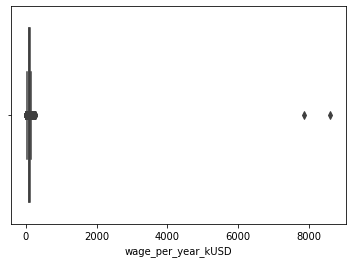

In [20]:
# deal with outliers
# find outliers
sns.boxplot(x = h1b_certified_salary_df['wage_per_year_kUSD'])

In [21]:
# drop outliers
h1b_certified_salary_df = h1b_certified_salary_df[(h1b_certified_salary_df['wage_per_year_kUSD'] <= 1000)]

In [22]:
# describe the annual salary after dropping the outliers
h1b_certified_salary_df.wage_per_year_kUSD.describe()

count    137757.000000
mean         92.403941
std          28.648410
min           0.019680
25%          74.984000
50%          90.147000
75%         107.973000
max         265.500000
Name: wage_per_year_kUSD, dtype: float64

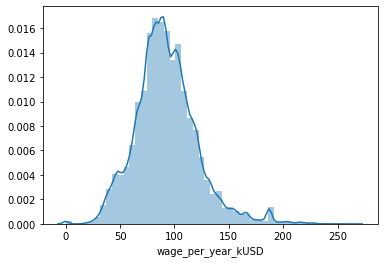

In [23]:
# annual salary distribution
x = h1b_certified_salary_df['wage_per_year_kUSD']
sns.distplot(x);

In [24]:
h1b_certified_salary_df.job_info_work_state.unique()

array(['MD', 'TX', 'NY', 'GA', 'MS', 'MA', 'ID', 'CA', 'NC', 'WA', 'OR',
       'IL', 'IA', 'CT', 'PA', 'MI', 'FL', 'NE', 'KS', 'VA', 'TN', 'MN',
       'PR', 'AR', 'NJ', 'AL', 'DE', 'NV', 'WY', 'VI', 'LA', 'OH', 'AZ',
       'SC', 'KY', 'MO', 'UT', 'OK', 'WI', 'CO', 'NH', 'DC', 'VT', 'IN',
       'GU', 'HI', 'ND', 'NM', 'RI', 'WV', 'SD', 'AK', 'ME', 'MT',
       'CALIFORNIA', 'TEXAS', 'ARIZONA', 'MASSACHUSETTS', 'MICHIGAN',
       'VIRGINIA', 'GEORGIA', 'PENNSYLVANIA', 'MARYLAND', 'INDIANA',
       'UTAH', 'NEW JERSEY', 'DELAWARE', 'ILLINOIS', 'LOUISIANA',
       'NEW YORK', 'WASHINGTON', 'OHIO', 'OKLAHOMA', 'FLORIDA', 'KANSAS',
       'WISCONSIN', 'COLORADO', 'NEBRASKA', 'DISTRICT OF COLUMBIA',
       'NEW MEXICO', 'CONNECTICUT', 'TENNESSEE', 'MISSOURI',
       'NORTH CAROLINA', 'VERMONT', 'KENTUCKY', 'MINNESOTA',
       'WEST VIRGINIA', 'ALABAMA', 'NEW HAMPSHIRE', 'OREGON', 'IDAHO',
       'MISSISSIPPI', 'RHODE ISLAND', 'IOWA', 'PUERTO RICO',
       'SOUTH CAROLINA', 'WYOMING', 'HAW

In [25]:
us_state_abbrev = {
    'ALABAMA': 'AL',
    'ALASKA': 'AK',
    'ARIZONA': 'AZ',
    'ARKANSAS': 'AR',
    'CALIFORNIA': 'CA',
    'COLORADO': 'CO',
    'CONNECTICUT': 'CT',
    'DELAWARE': 'DE',
    'DISTRICT OF COLUMBIA': 'DC',
    'FLORIDA': 'FL',
    'GEORGIA': 'GA',
    'HAWAII': 'HI',
    'IDAHO': 'ID',
    'ILLINOIS': 'IL',
    'INDIANA': 'IN',
    'IOWA': 'IA',
    'KANSAS': 'KS',
    'KENTUCKY': 'KY',
    'LOUISIANA': 'LA',
    'MAINE': 'ME',
    'MARYLAND': 'MD',
    'MASSACHUSETTS': 'MA',
    'MICHIGAN': 'MI',
    'MINNESOTA': 'MN',
    'MISSISSIPPI': 'MS',
    'MISSOURI': 'MO',
    'MONTANA': 'MT',
    'NEBRASKA': 'NE',
    'NEVADA': 'NV',
    'NEW HAMPSHIRE': 'NH',
    'NEW JERSEY': 'NJ',
    'NEW MEXICO': 'NM',
    'NEW YORK': 'NY',
    'NORTH CAROLINA': 'NC',
    'NORTH DAKOTA': 'ND',
    'NORTHERN MARIANA ISLANDS':'MP',
    'OHIO': 'OH',
    'OKLAHOMA': 'OK',
    'OREGON': 'OR',
    'Palau': 'PW',
    'PENNSYLVANIA': 'PA',
    'PUERTO RICO': 'PR',
    'RHODE ISLAND': 'RI',
    'SOUTH CAROLINA': 'SC',
    'SOUTH DAKOTA': 'SD',
    'TENNESSEE': 'TN',
    'TEXAS': 'TX',
    'UTAH': 'UT',
    'VERMONT': 'VT',
    'VIRGIN ISLANDS': 'VI',
    'VIRGINIA': 'VA',
    'WASHINGTON': 'WA',
    'WEST VIRGINIA': 'WV',
    'WISCONSIN': 'WI',
    'WYOMING': 'WY',
}
h1b_certified_salary_df['job_info_work_state'].replace(us_state_abbrev, inplace=True)

In [26]:
h1b_certified_salary_df.job_info_work_state.unique()

array(['MD', 'TX', 'NY', 'GA', 'MS', 'MA', 'ID', 'CA', 'NC', 'WA', 'OR',
       'IL', 'IA', 'CT', 'PA', 'MI', 'FL', 'NE', 'KS', 'VA', 'TN', 'MN',
       'PR', 'AR', 'NJ', 'AL', 'DE', 'NV', 'WY', 'VI', 'LA', 'OH', 'AZ',
       'SC', 'KY', 'MO', 'UT', 'OK', 'WI', 'CO', 'NH', 'DC', 'VT', 'IN',
       'GU', 'HI', 'ND', 'NM', 'RI', 'WV', 'SD', 'AK', 'ME', 'MT', 'GUAM',
       'MARSHALL ISLANDS', 'MP'], dtype=object)

In [27]:
h1b_certified_salary_df = h1b_certified_salary_df.loc[h1b_certified_salary_df.job_info_work_state.isin([
                         'VA', 'DE', 'NY', 'NJ', 'GA', 'TX', 'MS', 'MA', 'CA', 'NC', 'MD',
                         'IL', 'NV', 'IA', 'CT', 'MI', 'FL', 'NE', 'KS', 'TN', 'MN', 'PR',
                         'OR', 'AR', 'WA', 'PA', 'AL', 'WY', 'VI', 'LA', 'OH', 'DC', 'AZ',
                         'ND', 'MO', 'UT', 'RI', 'KY', 'WI', 'CO', 'IN', 'ID', 'VT', 'OK',
                         'GU', 'SC', 'NM', 'WV', 'NH', 'SD', 'HI', 'AK', 'ME', 'MT', 'MP'])].copy()

In [28]:
# create a dataframe with information related to state and salary
h1b_certified_salary_df = h1b_certified_salary_df[['wage_per_year_kUSD','job_info_work_state']]

In [29]:
h1b_certified_salary_df.head()

,wage_per_year_kUSD,job_info_work_state
2,47.923,MD
8,44.824,TX
11,46.176,NY
13,74.672,GA
20,141.731,TX


In [30]:
h1b_certified_state_salary_mean = h1b_certified_salary_df.groupby(['job_info_work_state']).mean()
h1b_certified_state_salary_mean.reset_index(inplace=True)

In [31]:
h1b_certified_state_salary_mean.head()

,job_info_work_state,wage_per_year_kUSD
0,AK,77.828291
1,AL,73.962443
2,AR,78.290726
3,AZ,81.729334
4,CA,104.887325


In [32]:
h1b_certified_state_salary_var = h1b_certified_salary_df.groupby(['job_info_work_state']).var()
h1b_certified_state_salary_var.reset_index(inplace=True)

In [33]:
h1b_certified_state_salary_var.head()

,job_info_work_state,wage_per_year_kUSD
0,AK,691.281152
1,AL,1434.278179
2,AR,1720.669013
3,AZ,640.859040
4,CA,715.439541


In [34]:
h1b_certified_state_salary_count = h1b_certified_salary_df.groupby(['job_info_work_state']).count().sort_values(by=['wage_per_year_kUSD'], ascending=False)
h1b_certified_state_salary_count.reset_index(inplace=True)

In [35]:
h1b_certified_state_salary_count.head(10)

,job_info_work_state,wage_per_year_kUSD
0,CA,32786
1,TX,17495
2,NJ,11549
3,NY,11261
4,IL,6135
5,WA,5510
6,MA,5488
7,MI,4890
8,VA,4303
9,GA,3976


In [36]:
temp = h1b_certified_salary_df.loc[h1b_certified_salary_df.job_info_work_state.isin(['CA','TX','NJ','NY','IL','WA','MA','MI','VA','GA'])].copy()

Text(0, 0.5, 'State')

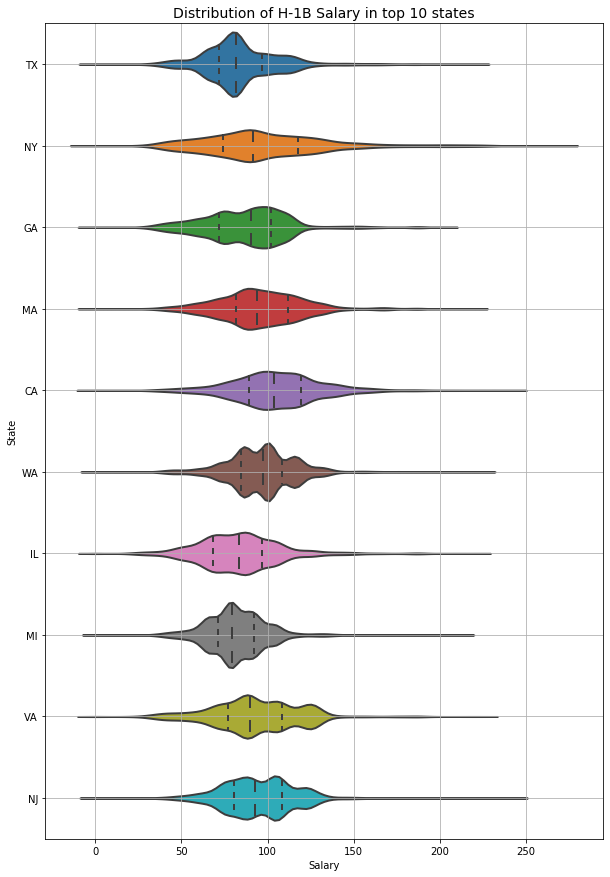

In [37]:
fig, ax = plt.subplots(figsize=(10,15))
ax = sns.violinplot(x='wage_per_year_kUSD',y='job_info_work_state', data=temp,dodge=True,inner="quartile",bw=.2, linewidth=2.0)
ax.set_title('Distribution of H-1B Salary in top 10 states', fontsize=14)
ax.grid(True)
plt.xlabel('Salary',size=10)
plt.ylabel('State',size=10)